In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.plotly as py
sns.set_style('whitegrid')
import cufflinks as cf
import datetime
import quandl
from pandas_datareader import data, wb

from scipy import stats
%matplotlib inline


In [74]:
py.sign_in("dattatele","93reCjIosFgiul4JuaIb")

In [75]:
# Widget related imports
from ipywidgets import interactive
from IPython.display import Audio, display
import ipywidgets as widgets
from IPython.display import display, clear_output, Javascript
from traitlets import Unicode

# nbconvert related imports
from nbconvert import get_export_names, export_by_name
from nbconvert.writers import FilesWriter
from nbformat import read, NO_CONVERT
from nbconvert.utils.exceptions import ConversionException

In [76]:
import pandas_datareader as web

In [77]:
notebook_name = widgets.Text()

In [78]:
js = """IPython.notebook.kernel.widget_manager.get_model('%s').then(function(model) {
    model.set('value', IPython.notebook.notebook_name);
    model.save();
});
""" % notebook_name.model_id
display(Javascript(data=js))

<IPython.core.display.Javascript object>

In [79]:
filename = notebook_name.value
filename

''

In [80]:
exporter_names = widgets.Dropdown(options=get_export_names(), value='html')
export_button = widgets.Button(description="Export")
download_link = widgets.HTML(visible=False)

In [81]:
quandl.ApiConfig.api_key = 'ygw7cuU2fx8t7pgxAtcm'

In [82]:
cof = quandl.get_table('WIKI/PRICES', ticker = 'COF', date = { 'gte': '2007-08-07', 'lte': '2017-08-07' })

In [83]:
cof['date'] = pd.to_datetime(cof['date'])

In [84]:
cof.set_index('date',inplace=True)

In [85]:
cof.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2007-08-07,COF,69.17,71.54,68.49,70.61,5236700.0,0.000000,1.0,58.642829,60.652132,58.066320,59.863671,5236700.0
2007-08-08,COF,70.61,73.79,70.23,71.59,6241200.0,0.026667,1.0,59.885970,62.583002,59.563684,60.717131,6241200.0
2007-08-09,COF,69.09,71.44,67.81,68.00,7182100.0,0.000000,1.0,58.596823,60.589913,57.511226,57.672369,7182100.0
2007-08-10,COF,67.09,69.33,66.30,69.10,5143800.0,0.000000,1.0,56.900577,58.800373,56.230560,58.605305,5143800.0
2007-08-13,COF,70.11,70.79,68.10,68.47,3552400.0,0.000000,1.0,59.461909,60.038633,57.757182,58.070987,3552400.0


In [86]:
jpm = quandl.get_table('WIKI/PRICES', ticker = ['JPM'], date = { 'gte': '2007-08-07', 'lte': '2017-08-07' })

In [87]:
jpm['date'] = pd.to_datetime(jpm['date'])

In [88]:
jpm.set_index('date',inplace=True)

In [89]:
jpm.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2007-08-07,JPM,44.99,46.05,44.15,45.34,30556500.0,0.0,1.0,35.320354,36.152529,34.660894,35.595129,30556500.0
2007-08-08,JPM,45.75,47.23,45.27,46.51,27447200.0,0.0,1.0,35.917008,37.078913,35.540174,36.513662,27447200.0
2007-08-09,JPM,45.04,45.94,44.17,44.17,39278200.0,0.0,1.0,35.359607,36.066172,34.676596,34.676596,39278200.0
2007-08-10,JPM,43.36,44.80,42.51,44.25,32549000.0,0.0,1.0,34.040688,35.171190,33.373377,34.739401,32549000.0
2007-08-13,JPM,45.23,45.43,43.68,43.83,21357600.0,0.0,1.0,35.508771,35.665785,34.291911,34.409671,21357600.0


In [90]:
tickers = ['JPM', 'COF']

In [91]:
bank_stocks = pd.concat([cof, jpm],axis=1,keys=tickers)

In [92]:
bank_stocks.head()

JPM                                                     \
           ticker   open   high    low  close     volume ex-dividend   
date                                                                   
2007-08-07    COF  69.17  71.54  68.49  70.61  5236700.0    0.000000   
2007-08-08    COF  70.61  73.79  70.23  71.59  6241200.0    0.026667   
2007-08-09    COF  69.09  71.44  67.81  68.00  7182100.0    0.000000   
2007-08-10    COF  67.09  69.33  66.30  69.10  5143800.0    0.000000   
2007-08-13    COF  70.11  70.79  68.10  68.47  3552400.0    0.000000   

                                                 ...        COF         \
           split_ratio   adj_open   adj_high     ...        low  close   
date                                             ...                     
2007-08-07         1.0  58.642829  60.652132     ...      44.15  45.34   
2007-08-08         1.0  59.885970  62.583002     ...      45.27  46.51   
2007-08-09         1.0  58.596823  60.589913     ...      44.17  44.17   
2007-08-10         1.0  56.900577  58.800373     ...      42.51  44.25   
2007-08-13         1.0  59.461909  60.038633     ...      43.68  43.83   

                                                                      \
                volume ex-dividend split_ratio   adj_open   adj_high   
date                                                                   
2007-08-07  30556500.0         0.0         1.0  35.320354  36.152529   
2007-08-08  27447200.0         0.0         1.0  35.917008  37.078913   
2007-08-09  39278200.0         0.0         1.0  35.359607  36.066172   
2007-08-10  32549000.0         0.0         1.0  34.040688  35.171190   
2007-08-13  21357600.0         0.0         1.0  35.508771  35.665785   

                                              
              adj_low  adj_close  adj_volume  
date                                          
2007-08-07  34.660894  35.595129  30556500.0  
2007-08-08  35.540174  36.513662  27447200.0  
2007-08-09  34.676596  34.676596  39278200.0  
2007-08-10  33.373377  34.739401  32549000.0  
2007-08-13  34.291911  34.409671  21357600.0  

[5 rows x 26 columns]

In [93]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [94]:
bank_stocks.head()

Bank Ticker    JPM                                                     \
Stock Info  ticker   open   high    low  close     volume ex-dividend   
date                                                                    
2007-08-07     COF  69.17  71.54  68.49  70.61  5236700.0    0.000000   
2007-08-08     COF  70.61  73.79  70.23  71.59  6241200.0    0.026667   
2007-08-09     COF  69.09  71.44  67.81  68.00  7182100.0    0.000000   
2007-08-10     COF  67.09  69.33  66.30  69.10  5143800.0    0.000000   
2007-08-13     COF  70.11  70.79  68.10  68.47  3552400.0    0.000000   

Bank Ticker                                       ...        COF         \
Stock Info  split_ratio   adj_open   adj_high     ...        low  close   
date                                              ...                     
2007-08-07          1.0  58.642829  60.652132     ...      44.15  45.34   
2007-08-08          1.0  59.885970  62.583002     ...      45.27  46.51   
2007-08-09          1.0  58.596823  60.589913     ...      44.17  44.17   
2007-08-10          1.0  56.900577  58.800373     ...      42.51  44.25   
2007-08-13          1.0  59.461909  60.038633     ...      43.68  43.83   

Bank Ticker                                                            \
Stock Info       volume ex-dividend split_ratio   adj_open   adj_high   
date                                                                    
2007-08-07   30556500.0         0.0         1.0  35.320354  36.152529   
2007-08-08   27447200.0         0.0         1.0  35.917008  37.078913   
2007-08-09   39278200.0         0.0         1.0  35.359607  36.066172   
2007-08-10   32549000.0         0.0         1.0  34.040688  35.171190   
2007-08-13   21357600.0         0.0         1.0  35.508771  35.665785   

Bank Ticker                                    
Stock Info     adj_low  adj_close  adj_volume  
date                                           
2007-08-07   34.660894  35.595129  30556500.0  
2007-08-08   35.540174  36.513662  27447200.0  
2007-08-09   34.676596  34.676596  39278200.0  
2007-08-10   33.373377  34.739401  32549000.0  
2007-08-13   34.291911  34.409671  21357600.0  

[5 rows x 26 columns]

In [95]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
JPM    96.12
COF    94.02
dtype: float64

In [96]:
bank_stocks['JPM'].max()

Stock Info
ticker                 COF
open                 96.21
high                 96.92
low                  94.81
close                96.12
volume         1.14574e+08
ex-dividend            0.4
split_ratio              1
adj_open           95.2817
adj_high           95.9849
adj_low            93.8952
adj_close          95.1926
adj_volume     1.14574e+08
dtype: object

In [97]:
returns = pd.DataFrame()

In [98]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change()
returns.head()

,JPM Return,COF Return
date,,
2007-08-07,NaN,NaN
2007-08-08,0.013879,0.025805
2007-08-09,-0.050147,-0.050312
2007-08-10,0.016176,0.001811
2007-08-13,-0.009117,-0.009492


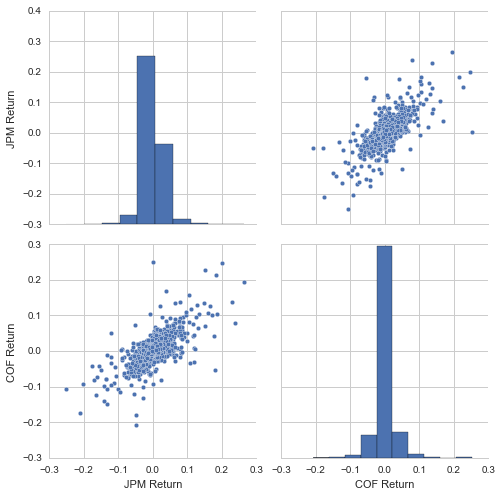

In [99]:
sns.pairplot(returns[1:],size=3.5)

In [100]:
returns.min()

JPM Return   -0.250420
COF Return   -0.207274
dtype: float64

In [101]:
returns.idxmin()

JPM Return   2009-04-20
COF Return   2009-01-20
dtype: datetime64[ns]

In [102]:
returns.idxmax()

JPM Return   2009-04-09
COF Return   2009-01-21
dtype: datetime64[ns]

In [103]:
returns.std()

JPM Return    0.032124
COF Return    0.027832
dtype: float64

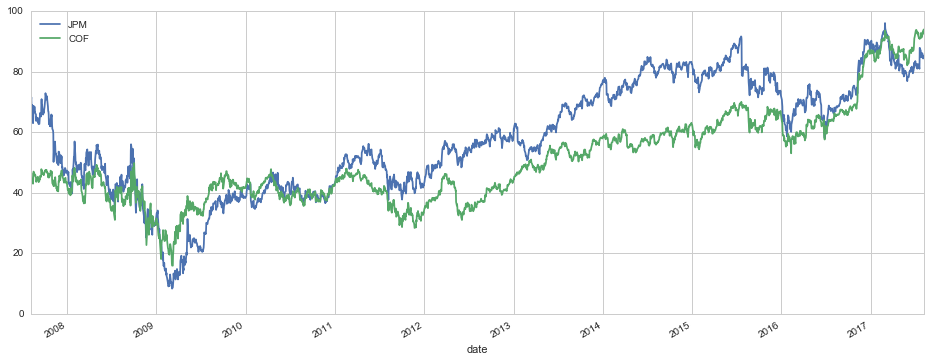

In [104]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(16,6),label=tick)
plt.legend(loc=2)

In [105]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

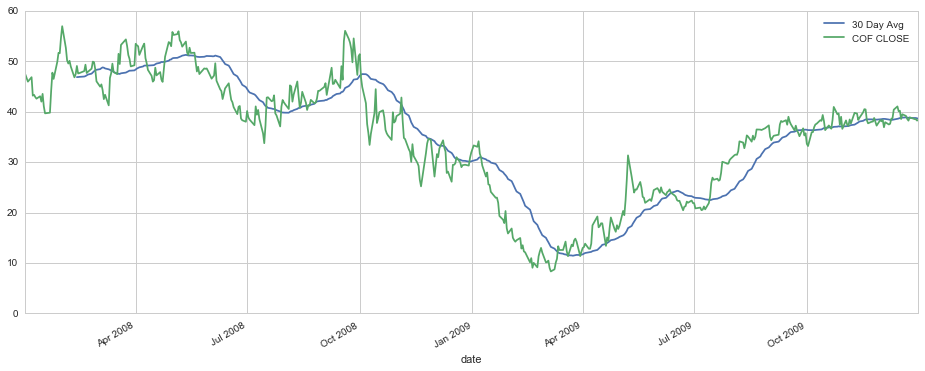

In [106]:
plt.figure(figsize=(16,6))
cof['close'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
cof['close'].loc['2008-01-01':'2010-01-01'].plot(label='COF CLOSE')
plt.legend()

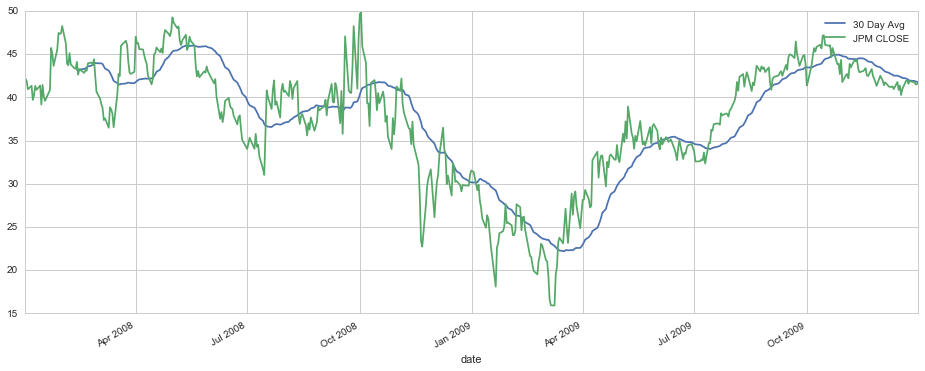

In [107]:
plt.figure(figsize=(16,6))
jpm['close'].loc['2008-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
jpm['close'].loc['2008-01-01':'2010-01-01'].plot(label='JPM CLOSE')
plt.legend()

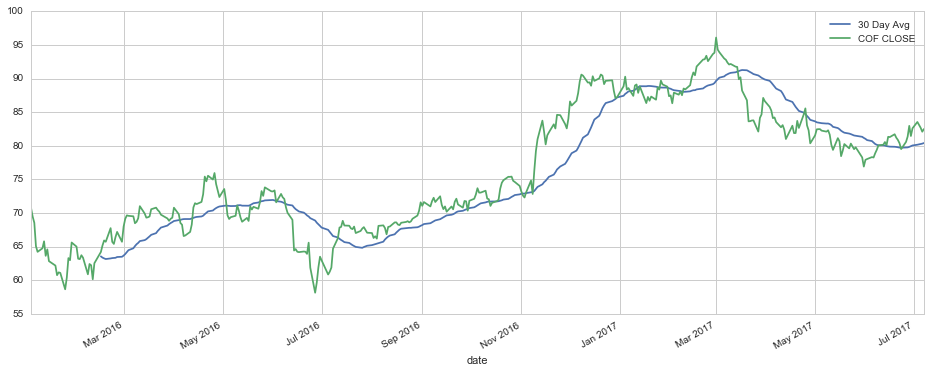

In [108]:
plt.figure(figsize=(16,6))
cof['close'].loc['2016-01-01':'2017-07-07'].rolling(window=30).mean().plot(label='30 Day Avg')
cof['close'].loc['2016-01-01':'2017-07-07'].plot(label='COF CLOSE')
plt.legend()

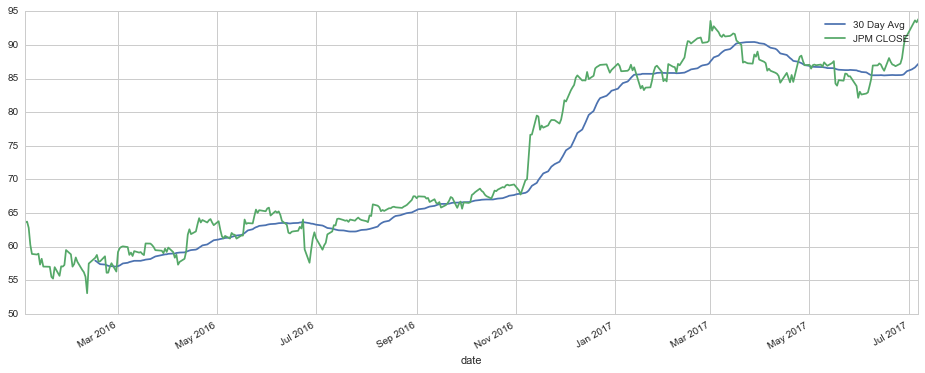

In [109]:
plt.figure(figsize=(16,6))
jpm['close'].loc['2016-01-01':'2017-07-07'].rolling(window=30).mean().plot(label='30 Day Avg')
jpm['close'].loc['2016-01-01':'2017-07-07'].plot(label='JPM CLOSE')
plt.legend()

In [110]:
cof[['open', 'high', 'low', 'close']].loc['2016-01-01':'2017-07-07'].iplot(kind='candle')

In [111]:
cof['close'].loc['2016-01-01':'2017-07-017'].ta_plot(study='sma',title='Simple Moving Averages')

In [112]:
cof['close'].loc['2016-01-01':'2017-07-07'].ta_plot(study='boll')

In [113]:
jpm['close'].loc['2016-01-01':'2017-07-07'].ta_plot(study='boll')

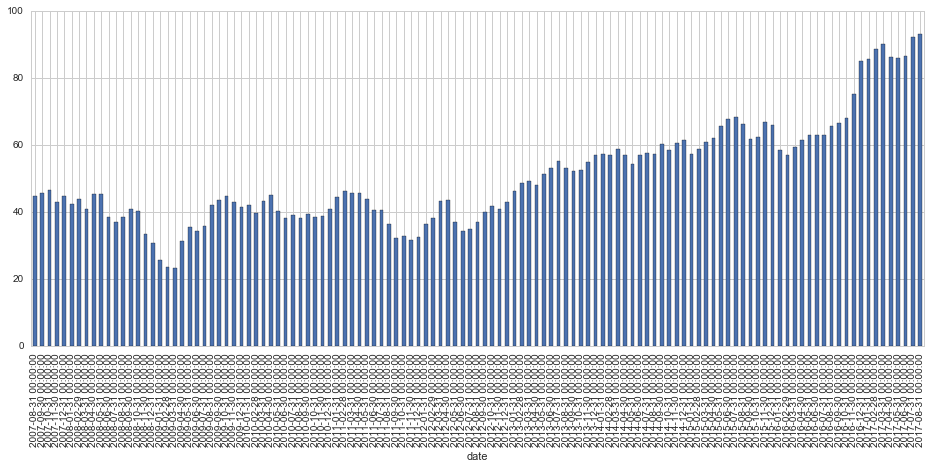

In [114]:
jpm['close'].resample('M').mean().plot(kind='bar', figsize=(16,6))

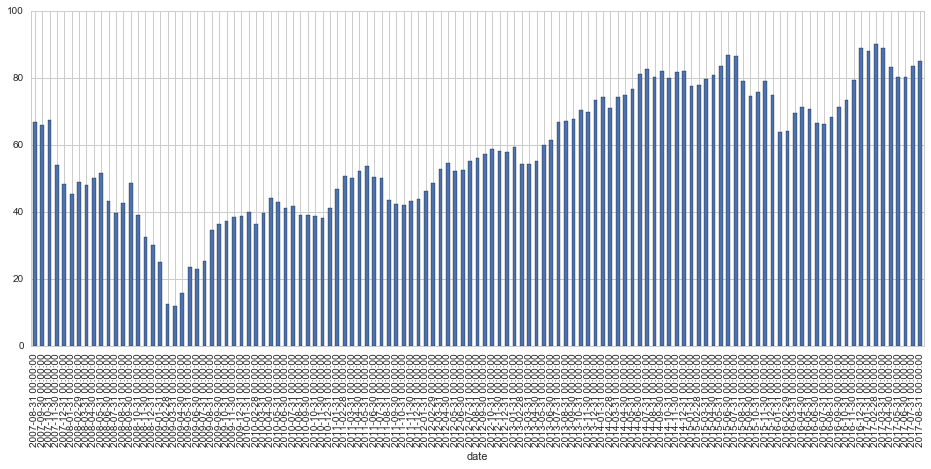

In [115]:
cof['close'].resample('M').mean().plot(kind='bar', figsize=(16,6))

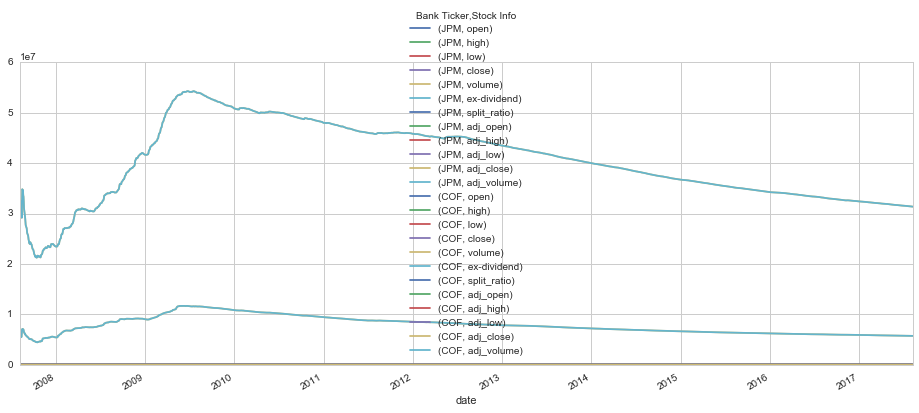

In [116]:
bank_stocks[['JPM', 'COF']].expanding().mean().plot(figsize=(16,6))

In [117]:
bank_stocks[['JPM', 'COF']].expanding().mean().iplot()

The draw time for this plot will be slow for clients without much RAM.


C:\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [118]:
jpm['First Difference'] = jpm['open'] - jpm['open'].shift(1)

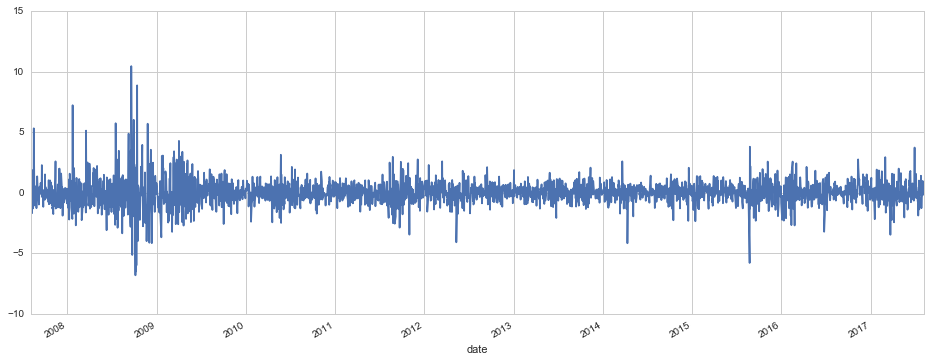

In [119]:
jpm['First Difference'].plot(figsize=(16,6))

In [120]:
cof['First Difference'] = cof['open'] - cof['open'].shift(1)

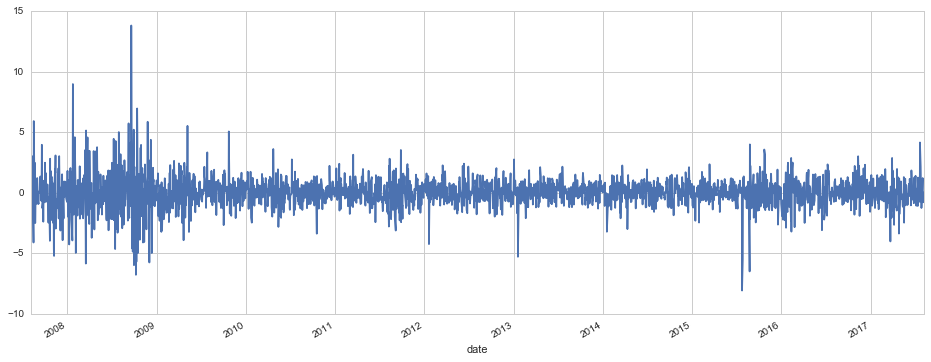

In [121]:
cof['First Difference'].plot(figsize=(16,6))

In [122]:
# Normalized return - like Cumulative daily return 
for stock_df in (cof,jpm):
    stock_df['Normed Return'] = stock_df['adj_close'] / stock_df.iloc[0]['adj_close']

In [123]:
cof.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,First Difference,Normed Return
date,,,,,,,,,,,,,,,
2007-08-07,COF,69.17,71.54,68.49,70.61,5236700.0,0.000000,1.0,58.642829,60.652132,58.066320,59.863671,5236700.0,NaN,1.000000
2007-08-08,COF,70.61,73.79,70.23,71.59,6241200.0,0.026667,1.0,59.885970,62.583002,59.563684,60.717131,6241200.0,1.44,1.014257
2007-08-09,COF,69.09,71.44,67.81,68.00,7182100.0,0.000000,1.0,58.596823,60.589913,57.511226,57.672369,7182100.0,-1.52,0.963395
2007-08-10,COF,67.09,69.33,66.30,69.10,5143800.0,0.000000,1.0,56.900577,58.800373,56.230560,58.605305,5143800.0,-2.00,0.978979
2007-08-13,COF,70.11,70.79,68.10,68.47,3552400.0,0.000000,1.0,59.461909,60.038633,57.757182,58.070987,3552400.0,3.02,0.970054


In [124]:
cof.tail()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,First Difference,Normed Return
date,,,,,,,,,,,,,,,
2017-08-01,COF,86.64,86.7300,85.64,86.01,1674120.0,0.0,1.0,86.232234,86.321811,85.236941,85.605199,1674120.0,1.22,1.430002
2017-08-02,COF,85.85,86.0200,85.38,85.71,2696282.0,0.0,1.0,85.445952,85.615152,84.978164,85.306611,2696282.0,-0.79,1.425015
2017-08-03,COF,85.31,85.6300,84.49,84.59,2208385.0,0.4,1.0,85.310000,85.630000,84.490000,84.590000,2208385.0,-0.54,1.413044
2017-08-04,COF,85.33,85.4199,84.26,84.41,2618921.0,0.0,1.0,85.330000,85.419900,84.260000,84.410000,2618921.0,0.02,1.410037
2017-08-07,COF,84.62,85.4200,84.38,85.15,1388253.0,0.0,1.0,84.620000,85.420000,84.380000,85.150000,1388253.0,-0.71,1.422399


In [125]:
jpm.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,First Difference,Normed Return
date,,,,,,,,,,,,,,,
2007-08-07,JPM,44.99,46.05,44.15,45.34,30556500.0,0.0,1.0,35.320354,36.152529,34.660894,35.595129,30556500.0,NaN,1.000000
2007-08-08,JPM,45.75,47.23,45.27,46.51,27447200.0,0.0,1.0,35.917008,37.078913,35.540174,36.513662,27447200.0,0.76,1.025805
2007-08-09,JPM,45.04,45.94,44.17,44.17,39278200.0,0.0,1.0,35.359607,36.066172,34.676596,34.676596,39278200.0,-0.71,0.974195
2007-08-10,JPM,43.36,44.80,42.51,44.25,32549000.0,0.0,1.0,34.040688,35.171190,33.373377,34.739401,32549000.0,-1.68,0.975959
2007-08-13,JPM,45.23,45.43,43.68,43.83,21357600.0,0.0,1.0,35.508771,35.665785,34.291911,34.409671,21357600.0,1.87,0.966696


In [126]:
jpm.tail()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,First Difference,Normed Return
date,,,,,,,,,,,,,,,
2017-08-01,JPM,92.490,93.14,92.280,93.03,12424667.0,0.0,1.0,92.490,93.14,92.280,93.03,12424667.0,0.980,2.613560
2017-08-02,JPM,92.865,93.21,92.505,93.11,10118266.0,0.0,1.0,92.865,93.21,92.505,93.11,10118266.0,0.375,2.615807
2017-08-03,JPM,92.700,93.13,92.235,92.50,11052753.0,0.0,1.0,92.700,93.13,92.235,92.50,11052753.0,-0.165,2.598670
2017-08-04,JPM,93.500,94.40,93.471,93.66,14292087.0,0.0,1.0,93.500,94.40,93.471,93.66,14292087.0,0.800,2.631259
2017-08-07,JPM,93.890,94.19,93.710,94.02,7917204.0,0.0,1.0,93.890,94.19,93.710,94.02,7917204.0,0.390,2.641373


#### Capital Assests Pricing Model (CAPM)- describe risk and seperating market return versus portfolio return
> A portfolio is a set of weighted securities. Returns of portfolio 
\begin{equation*} 
r_p(t) = \sum_{i=1}^{n} w_i r_i(t) 
\end{equation*}
> Weights for each company? Wi = MarketCaPi / Summation MarketCaPj,   Market Cap(number of shares*price)
> CAPM equation:
\begin{equation*} r_i(t) = b_i r_m(t) + \alpha_i(t)
\end{equation*}
>Like simple linear regeression, y=mx+b.
>CAPM equation describes the return of some individual stock i.
>CAPM states that aplha should be expected to be zero. 
>It basically implies that you can not beat the general marke. Alpha is random and cannot be predicted.
> Return of Portfolio, \begin{equation*} r_p(t) = b_p r_m(t) + \sum_{i=1}^{n} w_i \alpha_i(t) \end{equation*}
>Beta Term - there will be relationship between our portfolio return and the overall market return. 
>CAPM says that the alpha term can be predicted, we will fundamentally disagree with that model of thinking
>Create Strategies that allow us to have significant alpha terms, [i.e. beating the barket]


In [127]:
import pandas_datareader as web

In [128]:
start = pd.to_datetime('2007-08-07')
end = pd.to_datetime('2017-08-07')

In [129]:
spy_etf = web.DataReader('SPY', 'google',start,end)

In [130]:
spy_etf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-08-07,145.94,149.00,145.23,147.77,63637400
2007-08-08,148.41,150.59,147.34,149.83,28554400
2007-08-09,147.43,149.95,145.29,145.39,25668900
2007-08-10,144.39,146.50,143.12,144.71,26680900
2007-08-13,146.50,146.89,145.02,145.23,51858600


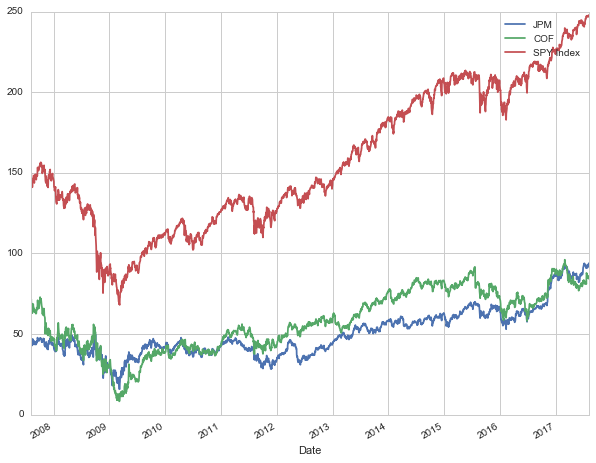

In [131]:
jpm['close'].plot(label='JPM', figsize=(10,8))
cof['close'].plot(label='COF')
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [132]:
jpm['cumulative'] = jpm['close']/jpm['close'].iloc[0]
cof['cumulative'] = cof['close']/cof['close'].iloc[0]
spy_etf['cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

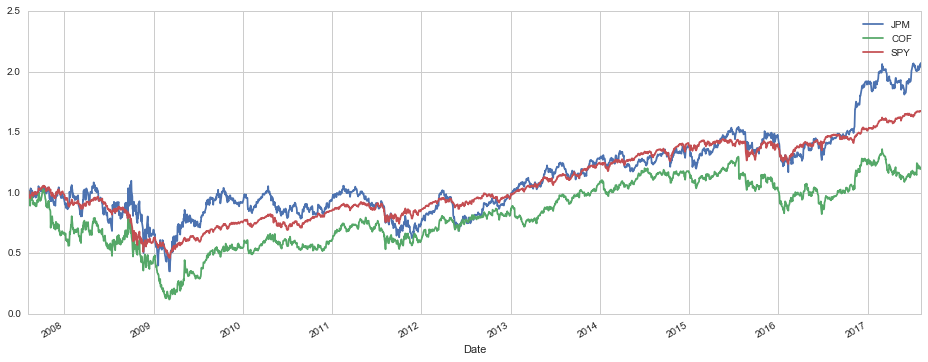

In [133]:
jpm['cumulative'].plot(label='JPM',figsize = (16,6))
cof['cumulative'].plot(label='COF')
spy_etf['cumulative'].plot(label='SPY')
plt.legend()

In [134]:
jpm['Daily Return'] = jpm['close'].pct_change(1)
cof['Daily Return'] = cof['close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

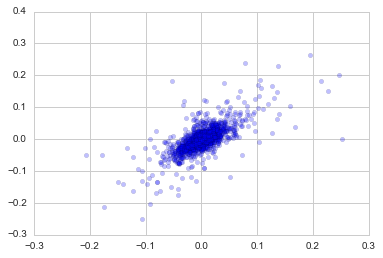

In [135]:
plt.scatter(jpm['Daily Return'],cof['Daily Return'],alpha=0.25)

In [136]:
beta,alpha,r_value,p_value,std_err = stats.linregress(jpm['Daily Return'].iloc[1:],
                                                     cof['Daily Return'].iloc[1:])

In [137]:
beta

0.82028916401077046

In [138]:
alpha

3.7798255601578009e-05

In [139]:
r_value

0.71068778594709325

> This is very useful tool to share and convert the file into different file format.
 __[source](https://github.com/jupyter-widgets/ipywidgets)__

In [140]:
file_writer = FilesWriter()

def export(name, nb):
    
    # Get a unique key for the notebook and set it in the resources object.
    notebook_name = name[:name.rfind('.')]
    resources = {}
    resources['unique_key'] = notebook_name
    resources['output_files_dir'] = '%s_files' % notebook_name

    # Try to export
    try:
        output, resources = export_by_name(exporter_names.value, nb)
    except ConversionException as e:
        download_link.value = "<br>Could not export notebook!"
    else:
        write_results = file_writer.write(output, resources, notebook_name=notebook_name)
    
        download_link.value = "<br>Results: <a href='files/{filename}'><i>\"{filename}\"</i></a>".format(filename=write_results)
        download_link.visible = True
        
def handle_export(widget):
    with open(filename, 'r') as f:
        export(filename, read(f, NO_CONVERT))
        
export_button.on_click(handle_export)

In [141]:
display(exporter_names, export_button, download_link)